In [1]:
import pandas as pd

C:\Users\zhana\AppData\Local\Temp\ipykernel_9872\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.__version__

'2.2.0'

In [7]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

In [8]:
data = pd.read_csv('C:/Users/zhana/nFactorial/training_data.csv', index_col=0)

In [9]:
data.head()

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,78830894-cdd8-43d1-9655-03db74141b7a,Female,80.0,0,1,never,25.19,6.6,140,0
1,32262c0e-903a-46b8-9061-b1a2f5a3e9b2,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,c4868b73-ca90-48ed-af14-3d1f78a5f030,Male,28.0,0,0,never,27.32,5.7,158,0
3,bec2ef91-5aff-48df-ac16-cb210b5f29fa,Female,36.0,0,0,current,23.45,5.0,155,0
4,1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73718 entries, 0 to 73717
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   73718 non-null  object 
 1   gender               73718 non-null  object 
 2   age                  73718 non-null  float64
 3   hypertension         73718 non-null  int64  
 4   heart_disease        73718 non-null  int64  
 5   smoking_history      73718 non-null  object 
 6   bmi                  73718 non-null  float64
 7   HbA1c_level          73718 non-null  float64
 8   blood_glucose_level  73718 non-null  int64  
 9   diabetes             73718 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 6.2+ MB


In [6]:
data.describe(include=[object])

,ID,gender,smoking_history
count,73718,73718,73718
unique,70000,3,6
top,fa10b3f7-e59b-49d1-bcd1-5d82f0448672,Female,never
freq,2,43097,26296


In [7]:
data.dtypes

ID                      object
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [8]:
data.isnull().sum()

ID                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
data.duplicated().sum()

3718

In [12]:
data = data.drop_duplicates()

In [13]:
data.shape

(70000, 10)

In [14]:
data.gender.nunique()

3

In [15]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [16]:
data_cleaned = data.drop('ID', axis=1)

In [17]:
data_cleaned.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [18]:
data_encoded = pd.get_dummies(data_cleaned, columns=['gender', 'smoking_history'], drop_first=True)

In [19]:
data_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [20]:
data_encoded_numeric = data_encoded.copy()
for column in data_encoded_numeric.columns:
    if data_encoded_numeric[column].dtype == 'bool':
        data_encoded_numeric[column] = data_encoded_numeric[column].astype(int)

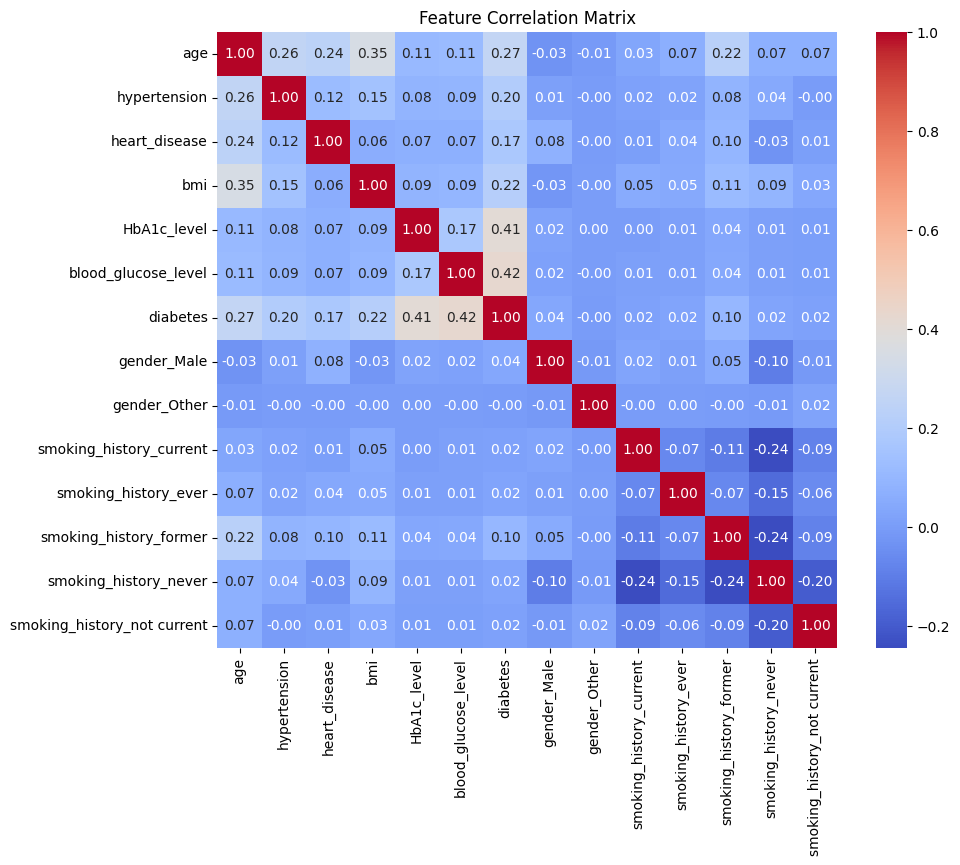

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

data_corr = data_encoded_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [22]:
X = data_encoded_numeric.drop('diabetes', axis=1)
y = data_encoded_numeric['diabetes']

In [19]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
split_info = {
    "X_train_shape": X_train.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_test_shape": y_test.shape
}

split_info

{'X_train_shape': (56000, 13),
 'X_test_shape': (14000, 13),
 'y_train_shape': (56000,),
 'y_test_shape': (14000,)}

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

logreg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier()
xgboost = XGBClassifier()
lightgbm = LGBMClassifier()

# Train the models
logreg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)

# Get feature importances where applicable
models = {
    'Decision Tree': decision_tree,
    'Gradient Boosting': gradient_boosting,
    'XGBoost': xgboost,
    'LightGBM': lightgbm
}

# Print feature importances
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        print(f"{model_name} feature importances:")
        feature_importances = model.feature_importances_
        for col, imp in zip(X.columns, feature_importances):
            print(f"{col}: {imp}")
        print("\n")

C:\Users\zhana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4957, number of negative: 51043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088518 -> initscore=-2.331868
[LightGBM] [Info] Start training from score -2.331868
Decision Tree feature importances:
age: 0.06853678196913247
hypertension: 0.005423626249365701
heart_disease: 0.004925237513719654
bmi: 0.11704697650631267
HbA1c_level: 0.49095522533266817
blood_glucose_level: 0.2662477806227623
gender_Male: 0.012907292793147408
gender_Other: 0.0
smoking_history_current: 0.006621430711001619
smoking_history_ever: 0.0060535421273

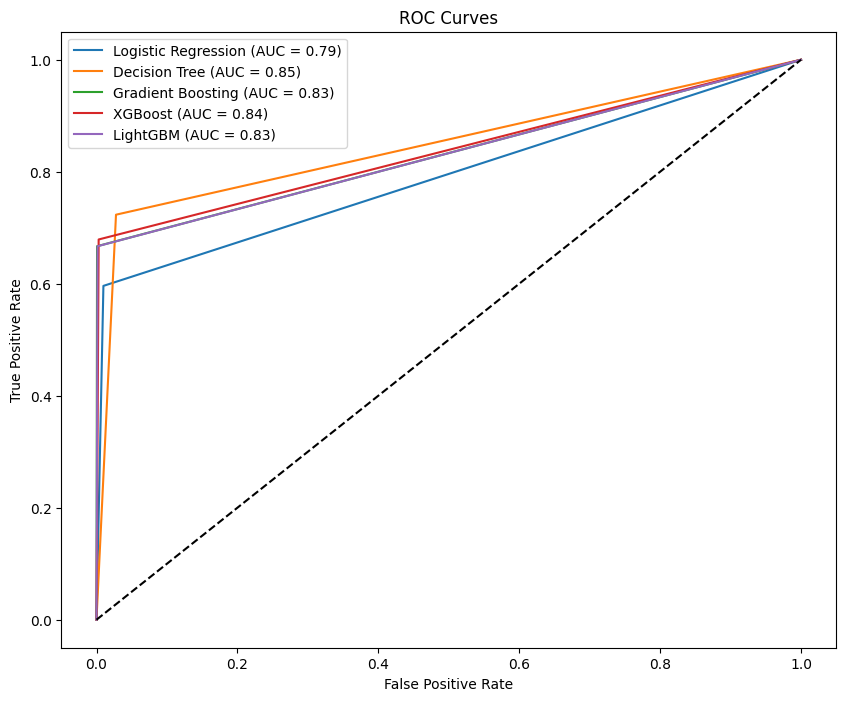

{'Logistic Regression': {'Accuracy': 0.9552142857142857,
  'Precision': 0.8556581986143187,
  'Recall': 0.5961383748994369,
  'F1 Score': 0.7027027027027027,
  'AUC': 0.7931699164612415},
 'Decision Tree': {'Accuracy': 0.9502142857142857,
  'Precision': 0.7180511182108626,
  'Recall': 0.7232502011263073,
  'F1 Score': 0.7206412825651303,
  'AUC': 0.8477895592916949},
 'Gradient Boosting': {'Accuracy': 0.9697142857142858,
  'Precision': 0.9880810488676997,
  'Recall': 0.666934835076428,
  'F1 Score': 0.7963496637848223,
  'AUC': 0.8330754758591358},
 'XGBoost': {'Accuracy': 0.9687142857142857,
  'Precision': 0.9558323895809739,
  'Recall': 0.6790024135156878,
  'F1 Score': 0.7939793038570084,
  'AUC': 0.8379726342094392},
 'LightGBM': {'Accuracy': 0.9690714285714286,
  'Precision': 0.9775943396226415,
  'Recall': 0.666934835076428,
  'F1 Score': 0.7929220468675277,
  'AUC': 0.8327227283479655}}

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary to hold model predictions
predictions = {
    "Logistic Regression": logreg.predict(X_test),
    "Decision Tree": decision_tree.predict(X_test),
    "Gradient Boosting": gradient_boosting.predict(X_test),
    "XGBoost": xgboost.predict(X_test),
    "LightGBM": lightgbm.predict(X_test)
}

# Dictionary to hold evaluation metrics
model_metrics = {}

# Evaluate each model
for model_name, preds in predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    }

# Plot ROC curves
plt.figure(figsize=(10, 8))

for model_name, preds in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {model_metrics[model_name]['AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

plt.show()

model_metrics

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset

# Filter the data for individuals with age >= 45
data_age_45 = data_encoded_numeric[data_encoded_numeric['age'] >= 45]

# Separate the features and target variable
X = data_age_45.drop('diabetes', axis=1)  # Replace 'diabetes' with your actual target variable name
y = data_age_45['diabetes']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Train the model using the training dataset
gradient_boosting.fit(X_train, y_train)

# Predict the risk of prediabetes
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model's performance (optional: you can also calculate accuracy, precision, recall, etc.)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.95
Precision: 0.98
Recall: 0.69
F1 Score: 0.81


In [40]:
import numpy as np


y_probs = gradient_boosting.predict_proba(X_test)[:, 1]

threshold_metrics = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Test thresholds between 0 and 1 in steps of 0.05
for threshold in np.arange(0, 1.05, 0.05):
    # Apply threshold to positive probabilities to create binary predictions
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate metrics
    threshold_metrics['Threshold'].append(threshold)
    threshold_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    threshold_metrics['Precision'].append(precision_score(y_test, y_pred, zero_division=0))
    threshold_metrics['Recall'].append(recall_score(y_test, y_pred))
    threshold_metrics['F1 Score'].append(f1_score(y_test, y_pred))

# Convert dictionary to DataFrame for better display and analysis
import pandas as pd
threshold_metrics_df = pd.DataFrame(threshold_metrics)

# Display the DataFrame sorted by Recall to see the threshold that maximizes Recall
threshold_metrics_df.sort_values(by='Recall', ascending=False)

,Threshold,Accuracy,Precision,Recall,F1 Score
0,0.00,0.164893,0.164893,1.000000,0.283104
1,0.05,0.728826,0.377293,0.990909,0.546503
2,0.10,0.826863,0.487095,0.943636,0.642526
3,0.15,0.890721,0.617183,0.888182,0.728289
4,0.20,0.917254,0.712074,0.836364,0.769231
5,0.25,0.933443,0.804267,0.788182,0.796143
6,0.30,0.939889,0.866737,0.750909,0.804676
7,0.35,0.941388,0.902384,0.722727,0.802625
8,0.40,0.944986,0.944242,0.708182,0.809351
9,0.45,0.945435,0.962312,0.696364,0.808017


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Output the best hyperparameters
print("Best hyperparameters:")
print(best_params)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'subsample': 1.0}


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use the best hyperparameters from the grid search to create a new model
best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=6,
    n_estimators=100,
    subsample=1.0,
    random_state=42
)

# Assuming X_train and y_train are your training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # probabilities for ROC AUC

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
  

Accuracy: 0.95
Precision: 0.97
Recall: 0.69
F1 Score: 0.81
ROC AUC: 0.97


In [29]:
# Set the desired threshold
threshold = 0.30
y_probs = best_model.predict_proba(X_test)[:, 1]

# Apply the threshold to the positive class probabilities to make new predictions
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Calculate the updated performance metrics
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)
roc_auc_adjusted = roc_auc_score(y_test, y_pred_proba)  # AUC remains unchanged since it's threshold-independent

# Print the updated metrics
print(f"Adjusted Accuracy: {accuracy_adjusted:.2f}")
print(f"Adjusted Precision: {precision_adjusted:.2f}")
print(f"Adjusted Recall: {recall_adjusted:.2f}")
print(f"Adjusted F1 Score: {f1_adjusted:.2f}")
print(f"Adjusted ROC AUC: {roc_auc_adjusted:.2f}")


Adjusted Accuracy: 0.94
Adjusted Precision: 0.84
Adjusted Recall: 0.76
Adjusted F1 Score: 0.80
Adjusted ROC AUC: 0.97


In [31]:
import pandas as pd

test_data_path = 'C:/Users/zhana/nFactorial/test_data.csv'
test_data = pd.read_csv(test_data_path)

test_data_processed = test_data.drop(['Unnamed: 0'], axis=1, errors='ignore')

test_data_processed = pd.get_dummies(test_data_processed, columns=['gender', 'smoking_history'])

missing_cols = set(X_train.columns) - set(test_data_processed.columns)
for col in missing_cols:
    test_data_processed[col] = 0
test_data_processed = test_data_processed[X_train.columns]

predictions = best_model.predict(test_data_processed)

test_data['prediction'] = predictions

output_path = 'C:/Users/zhana/nFactorial/submission.csv'
test_data[['ID', 'prediction']].to_csv(output_path, index=False)

print(f"Submission file saved to: {output_path}")


Submission file saved to: C:/Users/zhana/nFactorial/submission.csv


In [32]:
test_data

,Unnamed: 0,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,prediction
0,0,ba0d6256-ca6e-46a7-a2fb-2518a8937fd7,Female,60.0,1,0,former,23.77,4.8,130,0
1,1,7102b1ab-c7a4-4a43-b1fc-cb588d0553b8,Male,2.0,0,0,No Info,15.19,5.0,159,0
2,2,51ba207e-4934-41b4-a31c-cd275c5ca555,Female,74.0,0,0,not current,39.59,6.5,160,0
3,3,7e17faaa-0402-4728-9719-83982eba3afd,Female,51.0,0,0,never,26.67,6.6,80,0
4,4,08b4e515-286e-4393-9a55-138962f9546e,Male,35.0,0,0,never,26.09,3.5,159,0
...,...,...,...,...,...,...,...,...,...,...,...
26141,26141,1f8db6fe-03f8-48ca-9a42-9f12062b002d,Female,31.0,0,0,never,27.32,6.1,140,0
26142,26142,5bf3ca1a-ced5-474b-a354-cc3bec9f16d3,Female,65.0,1,1,never,27.25,5.7,100,0
26143,26143,930e6345-a920-47dd-abd0-6bc0be2ae56f,Male,30.0,1,0,former,57.17,5.8,300,1
26144,26144,035f3cc4-e8af-448a-8172-a1b027e06de1,Male,20.0,0,0,never,32.70,6.2,159,0


In [33]:
data_cleaned

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
69995,Female,36.0,0,0,No Info,24.60,4.8,145,0
69996,Female,2.0,0,0,No Info,17.37,6.5,100,0
69997,Male,66.0,0,0,former,27.83,5.7,155,0
69998,Female,24.0,0,0,never,35.42,4.0,100,0
